In [1]:
import pandas as pd
import numpy as np
import wfdb
from tqdm import tqdm
import ast
import seaborn as sns
import matplotlib.pyplot as plt

import cv2



In [2]:
# from skimage.morphology import skeletonize
# from scipy import ndimage
from scipy import signal
import tensorflow as tf


In [ ]:
path = './ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'

In [4]:
sampling_rate=100

In [5]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_lr)]
    else:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_hr)]
    data = np.array([signal for signal, meta in data])
    return data

In [6]:
ecgdf = pd.read_csv(f'{path}/ptbxl_database.csv',index_col='ecg_id')

In [7]:
ecgdf.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [8]:
ecgdf.scp_codes = ecgdf.scp_codes.apply(lambda x: ast.literal_eval(x))

In [9]:
ecg = load_raw_data(ecgdf, sampling_rate, path)

100%|██████████| 21837/21837 [00:34<00:00, 633.66it/s]


In [10]:
ecgdf.filename_lr

ecg_id
1        records100/00000/00001_lr
2        records100/00000/00002_lr
3        records100/00000/00003_lr
4        records100/00000/00004_lr
5        records100/00000/00005_lr
                   ...            
21833    records100/21000/21833_lr
21834    records100/21000/21834_lr
21835    records100/21000/21835_lr
21836    records100/21000/21836_lr
21837    records100/21000/21837_lr
Name: filename_lr, Length: 21837, dtype: object

In [11]:
ecgdf.filename_hr

ecg_id
1        records500/00000/00001_hr
2        records500/00000/00002_hr
3        records500/00000/00003_hr
4        records500/00000/00004_hr
5        records500/00000/00005_hr
                   ...            
21833    records500/21000/21833_hr
21834    records500/21000/21834_hr
21835    records500/21000/21835_hr
21836    records500/21000/21836_hr
21837    records500/21000/21837_hr
Name: filename_hr, Length: 21837, dtype: object

In [12]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
print(agg_df.shape)
agg_df.head()

(44, 12)


,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [13]:
agg_df.index

Index(['NDT', 'NST_', 'DIG', 'LNGQT', 'NORM', 'IMI', 'ASMI', 'LVH', 'LAFB',
       'ISC_', 'IRBBB', '1AVB', 'IVCD', 'ISCAL', 'CRBBB', 'CLBBB', 'ILMI',
       'LAO/LAE', 'AMI', 'ALMI', 'ISCIN', 'INJAS', 'LMI', 'ISCIL', 'LPFB',
       'ISCAS', 'INJAL', 'ISCLA', 'RVH', 'ANEUR', 'RAO/RAE', 'EL', 'WPW',
       'ILBBB', 'IPLMI', 'ISCAN', 'IPMI', 'SEHYP', 'INJIN', 'INJLA', 'PMI',
       '3AVB', 'INJIL', '2AVB'],
      dtype='object')

In [14]:
ecgdf.scp_codes

ecg_id
1                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                             {'NORM': 80.0, 'SBRAD': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
5                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21833    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21834             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21835                           {'ISCAS': 50.0, 'SR': 0.0}
21836                           {'NORM': 100.0, 'SR': 0.0}
21837                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21837, dtype: object

In [15]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))
    
# Apply diagnostic superclass
ecgdf['diagnostic_superclass'] = ecgdf.scp_codes.apply(aggregate_supclass_diagnostic)
ecgdf['diagnostic_superclass_len'] = ecgdf['diagnostic_superclass'].apply(len)
ecgdf.loc[ecgdf.diagnostic_superclass_len > 1, 'diagnostic_superclass']

ecg_id
39       [STTC, MI]
45        [HYP, CD]
50         [MI, CD]
77         [MI, CD]
87       [STTC, CD]
            ...    
21815      [MI, CD]
21821    [NORM, CD]
21827    [STTC, MI]
21828    [STTC, MI]
21829    [NORM, CD]
Name: diagnostic_superclass, Length: 5158, dtype: object

In [16]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+r for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
ecgdf['diagnostic_subclass'] = ecgdf.scp_codes.apply(aggregate_subclass_diagnostic)
ecgdf['diagnostic_subclass_len'] = ecgdf['diagnostic_subclass'].apply(len)
ecgdf.loc[ecgdf.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_STTC, sub_NST_]
28                    [sub_STTC, sub_NST_]
39           [sub_IMI, sub_STTC, sub_NST_]
45       [sub_RAO/RAE, sub_IRBBB, sub_RVH]
50                     [sub_LMI, sub_IVCD]
                       ...                
21821                [sub_IRBBB, sub_NORM]
21827                  [sub_IMI, sub_ISCA]
21828                  [sub_IMI, sub_ISCA]
21829                [sub_IRBBB, sub_NORM]
21832            [sub_LAFB/LPFB, sub_IVCD]
Name: diagnostic_subclass, Length: 6191, dtype: object

In [17]:
all_superclass = pd.Series(np.concatenate(ecgdf['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(ecgdf['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [ ]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1
            
        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]
    
    for sc in update_cols:
        y_selected[sc] = 0
        
    cls_updt = ClassUpdate(update_cols)
    
    y_selected = y_selected.apply(cls_updt, axis=1)
    
    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

x_all, y_all = get_data_by_folds(np.arange(1, 11), ecg, ecgdf, update_cols, meta_cols)


In [19]:
def plot_superclass(superclass):
    filt = y_all[superclass] == 1
    y_selected = y_all.loc[filt]
    x_selected = x_all[filt]
    
    for i in range(sample_num):
        y_ = y_selected.iloc[i]
        x_ = x_selected[i]
        
        #display(y_)
        #print(y_.shape, x_.shape); assert False
        bar, axes = plt.subplots(x_.shape[1], 1, figsize=(10,10))
        title = "Superclass = {}, Age = {}, Height = {}, Weight = {}, Sex = {}, Nurse = {}, Site = {}, Device = {}".format(superclass, 
                                                                                                                           y_['age'], y_['height'], y_['weight'],
                                                                                                                           y_['sex'], y_['nurse'], y_['site'], y_['device'],)
        axes[0].set_title(title, fontsize=15)
        
        for c in np.arange(x_.shape[1]):
            sns.lineplot(x=np.arange(x_.shape[0]), y=x_[:, c], ax=axes[c])
        
        plt.tight_layout()
        plt.show()
        #assert False

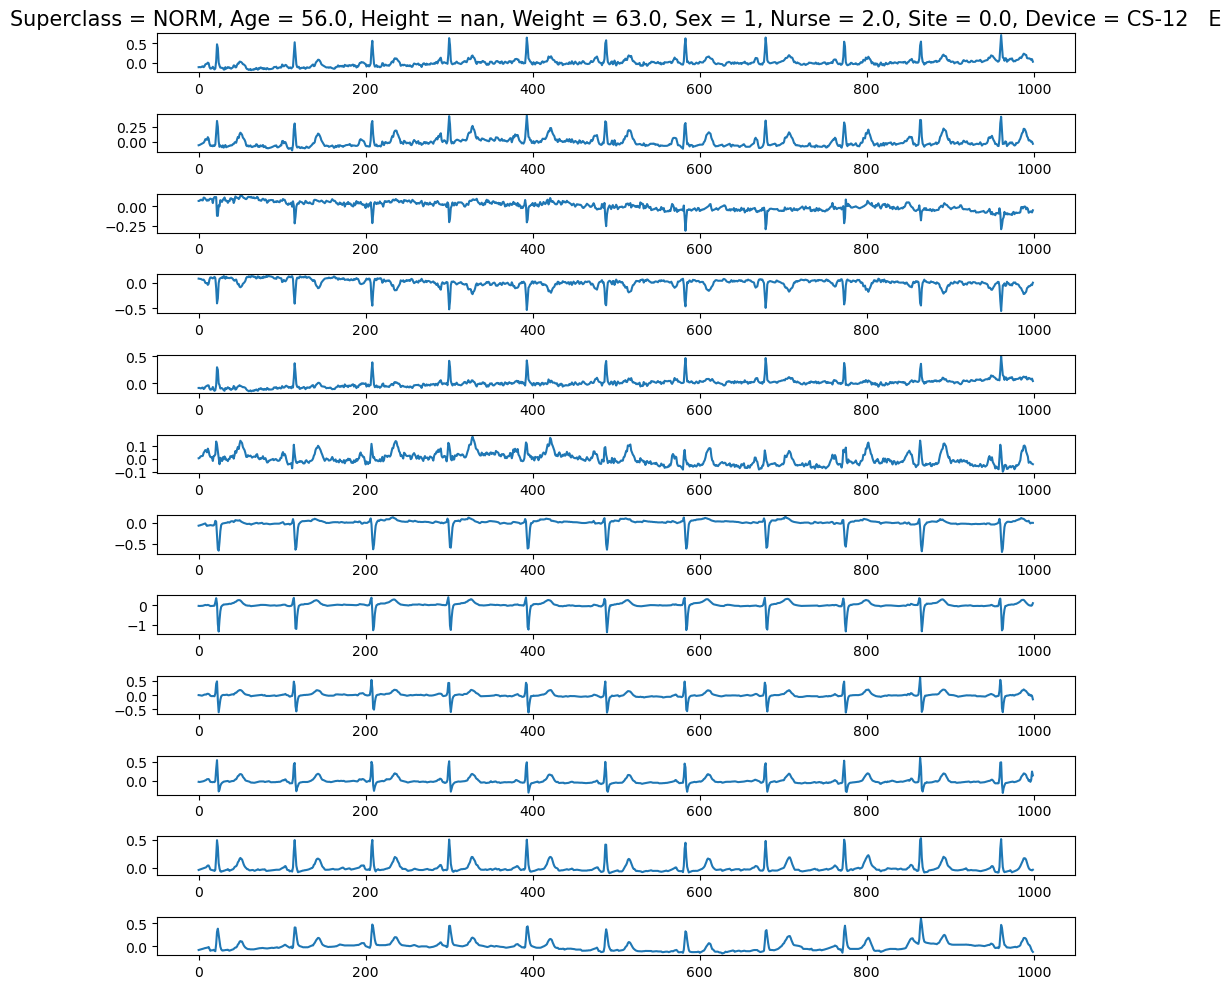

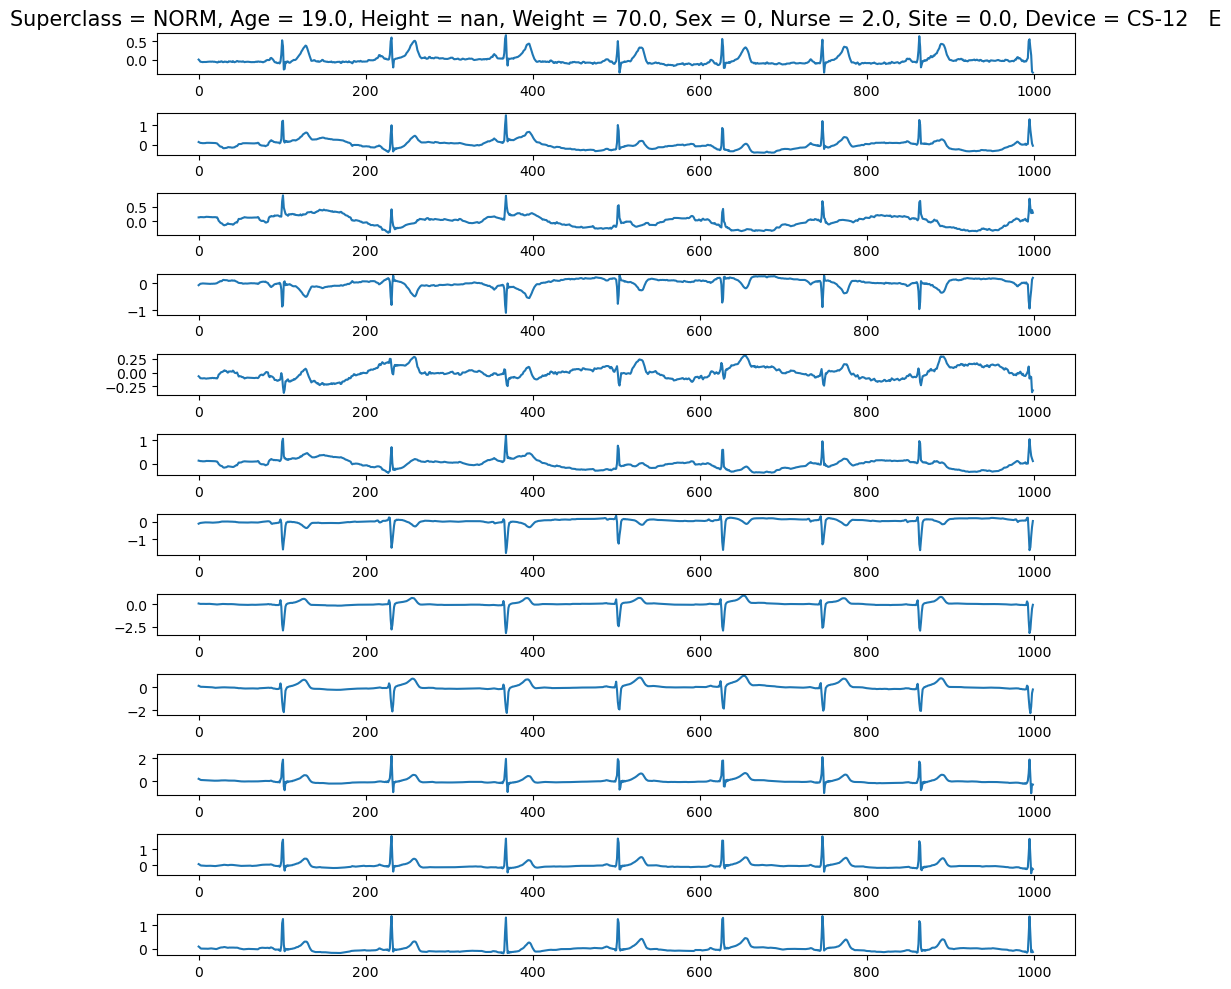

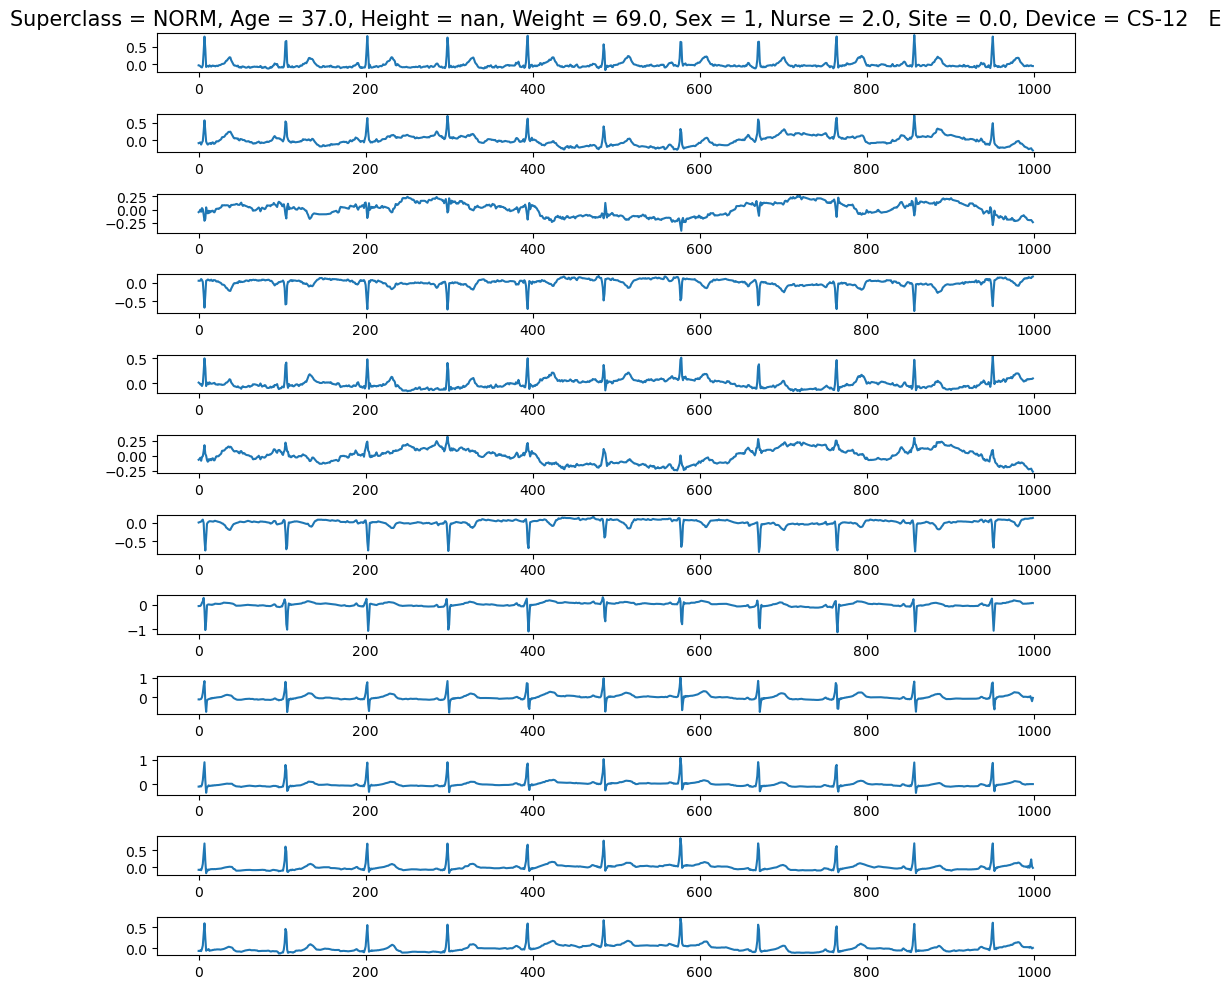

In [20]:
sample_num = 3
plot_superclass('NORM')

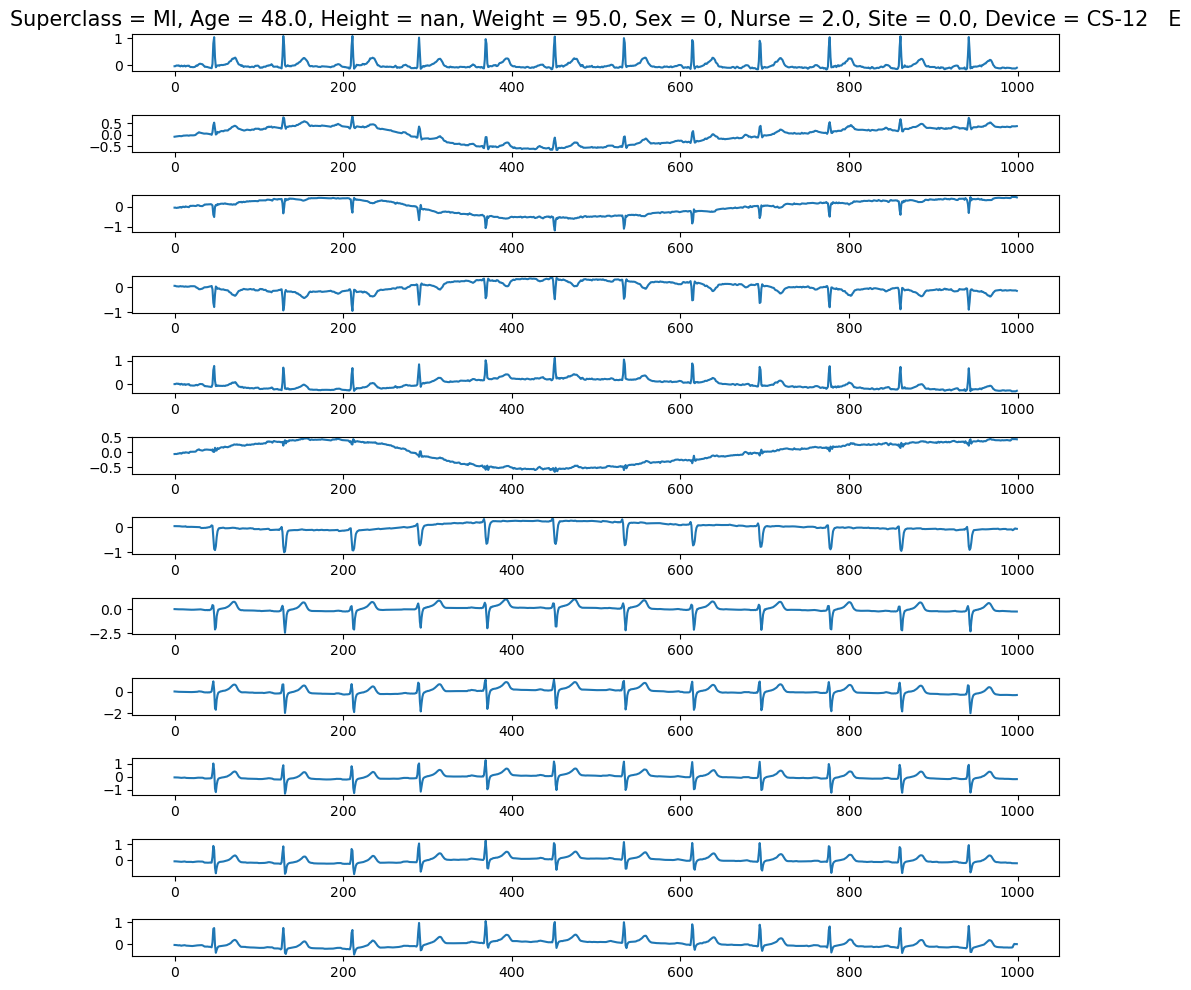

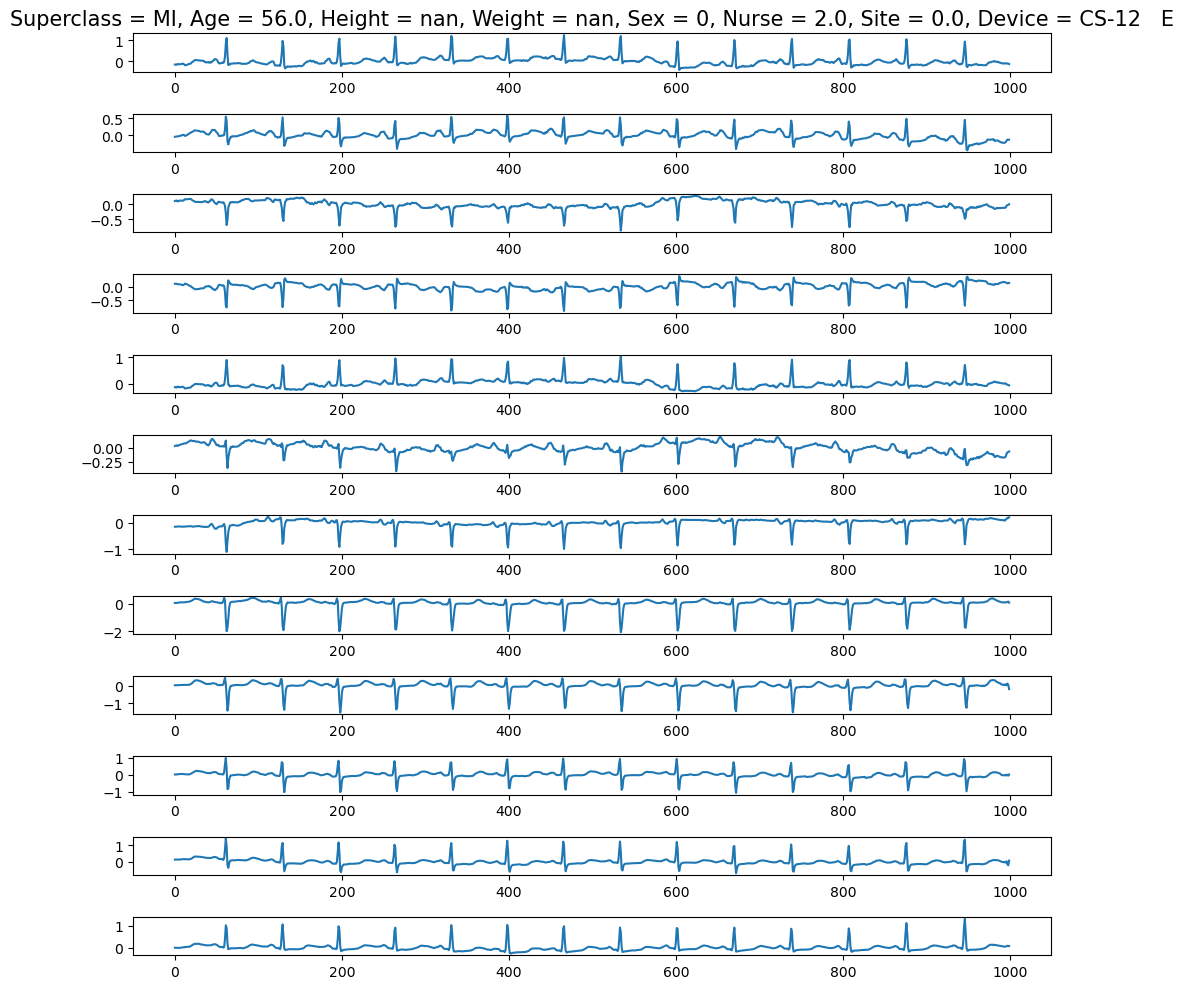

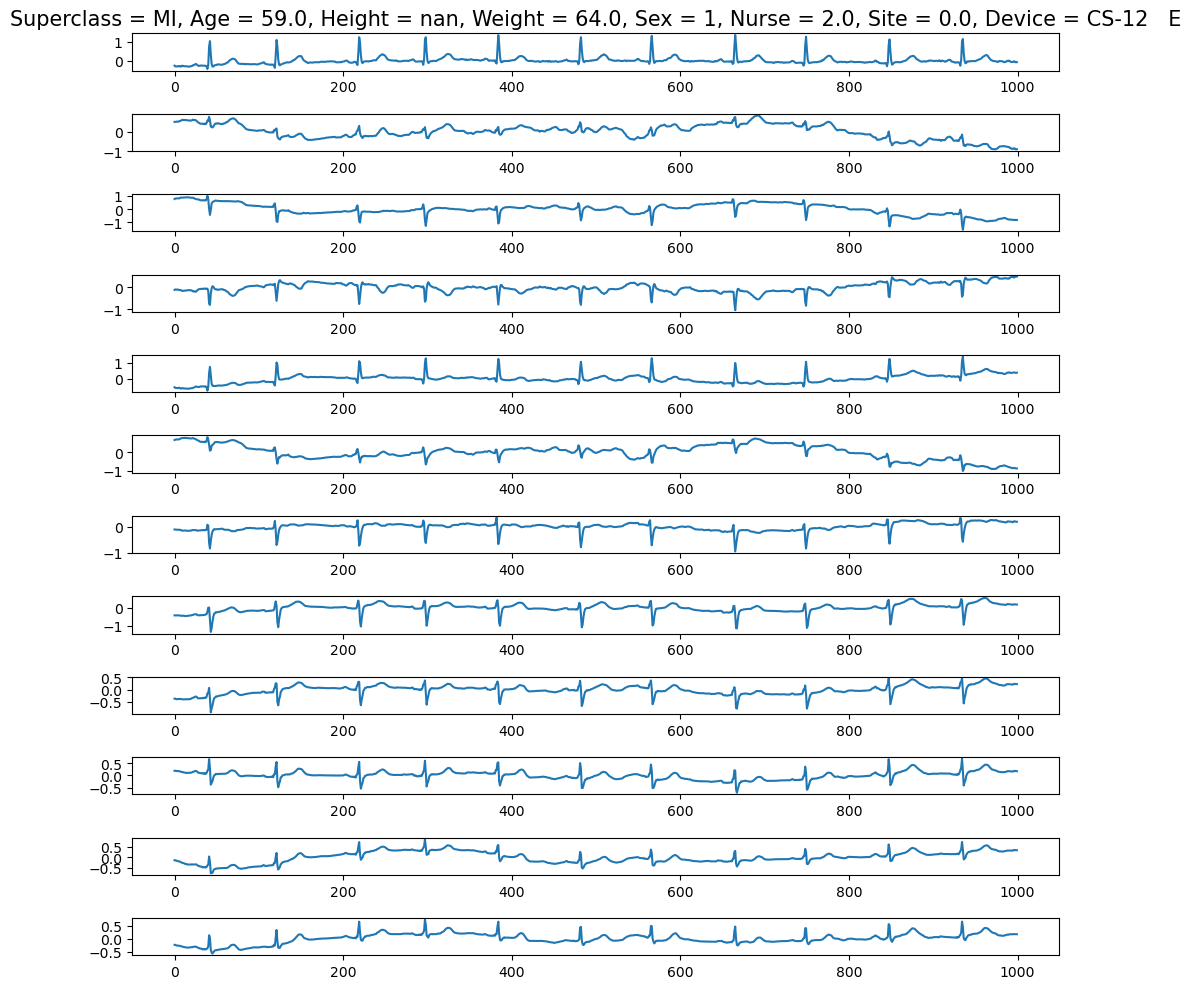

In [21]:
sample_num = 3
plot_superclass('MI')

---

Filters for data:

In [110]:
y_all

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4
21835,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [115]:
final_ecg_df = y_all.copy()

In [118]:
x_all.shape

(21837, 1000, 12)

In [112]:
final_ecg_df['ecg_heads'] = x_all

In [119]:
final_ecg_df.shape

(21837, 36)

In [132]:
final_ecg_df['ecg_heads'] = list(x_all.transpose(0, 2, 1))


In [133]:
final_ecg_df.head()

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold,ecg_heads
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,3,"[[-0.119, -0.116, -0.12, -0.117, -0.103, -0.09..."
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,2,"[[0.004, -0.02, -0.053, -0.056, -0.062, -0.065..."
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,5,"[[-0.029, -0.035, -0.054, -0.078, -0.088, -0.0..."
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,3,"[[-0.054, -0.053, -0.063, -0.06, -0.05, -0.054..."
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,4,"[[-0.034, -0.038, -0.057, -0.066, -0.08, -0.08..."


for final_ecg_df col 'ecg_heads' apply transpose(0, 2, 1)

In [134]:
final_ecg_df['ecg_heads'][1].shape

(12, 1000)

prepare final_ecg_df for teaining of ml model. TO do that shuffle the df then split it into 3 train, test, val in ration 6:2:2. set ecg_heads col as model input .['NORM','MI','STTC', 'HYP', 'CD'] cols are classes they are hot encoded so they the classes so they are model output.

In [135]:
# Shuffle the DataFrame and split into train, test, val (60:20:20)
df_shuffled = final_ecg_df.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df_shuffled)
train_end = int(0.6 * n)
test_end = train_end + int(0.2 * n)

train_df = df_shuffled.iloc[:train_end]
test_df = df_shuffled.iloc[train_end:test_end]
val_df = df_shuffled.iloc[test_end:]

# Set model input as ecg_heads and model output as hot-encoded classes ['NORM','MI','STTC','HYP','CD']
X_train = np.array(train_df['ecg_heads'].tolist())
X_test = np.array(test_df['ecg_heads'].tolist())
X_val = np.array(val_df['ecg_heads'].tolist())

target_columns = ['NORM', 'MI', 'STTC', 'HYP', 'CD']
y_train = train_df[target_columns].values
y_test = test_df[target_columns].values
y_val = val_df[target_columns].values

print("Training samples:", X_train.shape, y_train.shape)
print("Testing samples:", X_test.shape, y_test.shape)
print("Validation samples:", X_val.shape, y_val.shape)

Training samples: (13102, 12, 1000) (13102, 5)
Testing samples: (4367, 12, 1000) (4367, 5)
Validation samples: (4368, 12, 1000) (4368, 5)


In [208]:
X_train = np.expand_dims(np.array(train_df['ecg_heads'].tolist()), -1)

In [209]:
X_train.shape

(13102, 12, 1000, 1)

In [22]:
y_all.columns.to_list()

['age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'NORM',
 'MI',
 'STTC',
 'HYP',
 'CD',
 'sub_NORM',
 'sub_IMI',
 'sub_STTC',
 'sub_NST_',
 'sub_LVH',
 'sub_LAFB/LPFB',
 'sub_RAO/RAE',
 'sub_IRBBB',
 'sub_RVH',
 'sub_IVCD',
 'sub_LMI',
 'sub_AMI',
 'sub__AVB',
 'sub_ISCA',
 'sub_ISC_',
 'sub_SEHYP',
 'sub_ISCI',
 'sub_CRBBB',
 'sub_CLBBB',
 'sub_LAO/LAE',
 'sub_ILBBB',
 'sub_WPW',
 'sub_PMI',
 'strat_fold']

In [109]:
512//2

256

In [107]:
x_selected = x_all[y_all['NORM'] == 1]

In [108]:
x_selected.shape

(9528, 1000, 12)

In [25]:
test = x_selected.transpose(0, 2, 1)

In [26]:
x_selected[0]

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]])

In [27]:
sample_data =  test[0][0]

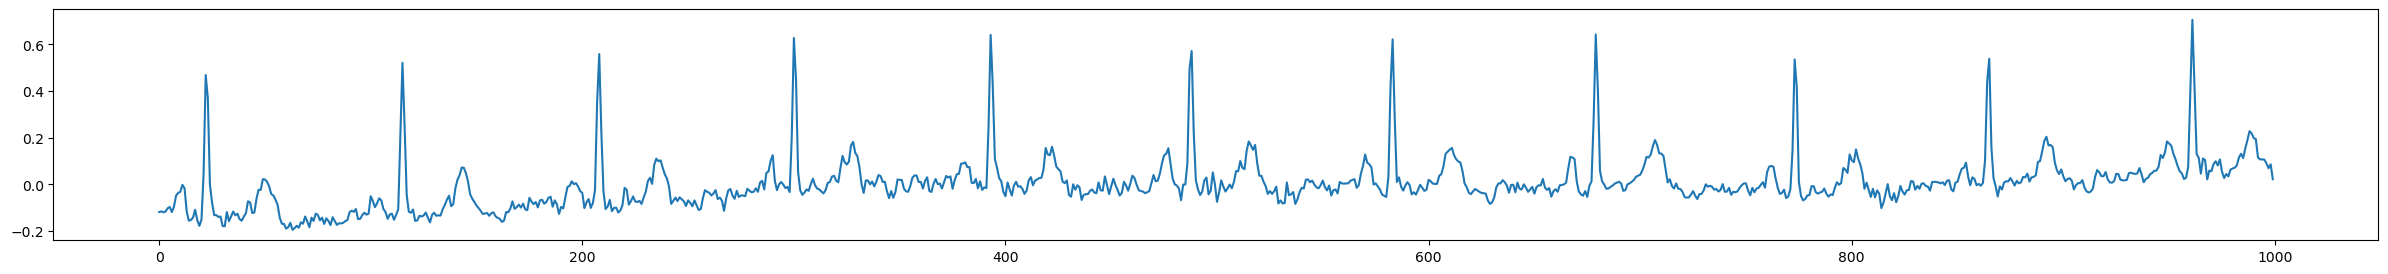

In [28]:
plt.figure(figsize=(30, 3))
plt.plot(sample_data)
plt.show()

In [29]:
fs = 4

In [30]:
clean_rr_interpolated_ecg = sample_data

In [31]:
# clean_rr_interpolated_ecg = np.sin(2 * np.pi * 0.1 * sample_data) + 0.5 * np.random.randn(len(sample_data))

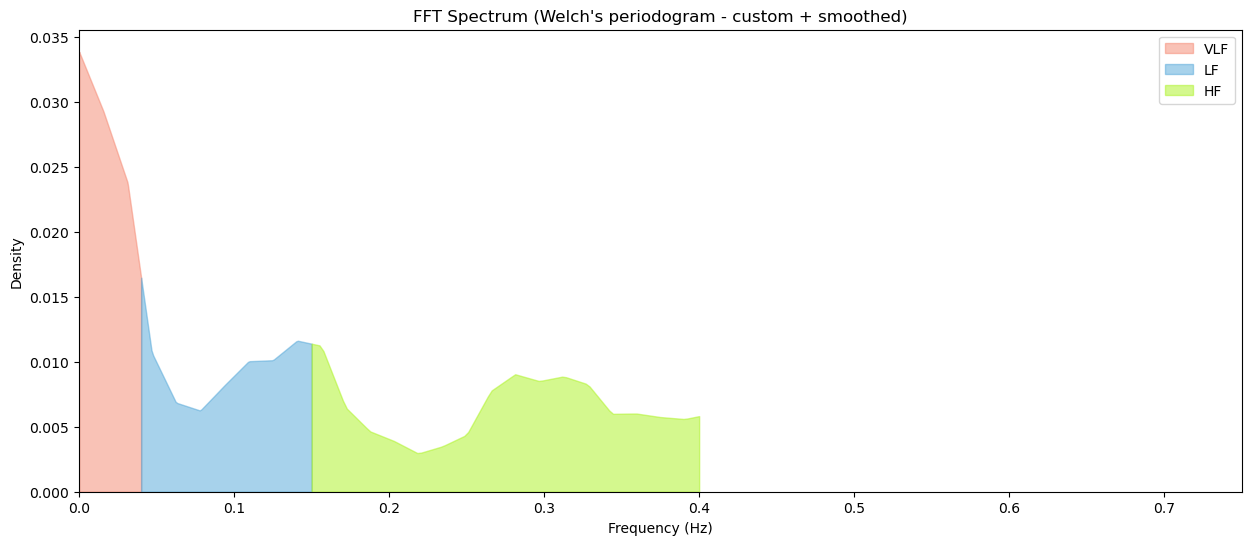

In [32]:
# Compute Welch's approximation manually (same as before)
def custom_welch(x, fs, nperseg):
    step = nperseg // 2
    segments = []
    for start in range(0, len(x) - nperseg + 1, step):
        segment = x[start:start + nperseg]
        window = np.hanning(nperseg)
        segment = segment * window
        freqs = np.fft.rfftfreq(nperseg, 1 / fs)
        fft_vals = np.fft.rfft(segment)
        psd = (np.abs(fft_vals) ** 2) / (fs * np.sum(window**2))
        segments.append(psd)
    segments = np.array(segments)
    avg_psd = np.mean(segments, axis=0)
    return freqs, avg_psd

fxx, pxx = custom_welch(clean_rr_interpolated_ecg, fs=fs, nperseg=256)

# Smooth PSD using Pandas rolling mean (window=5 points)
psd_smoothed = pd.Series(pxx).rolling(window=5, center=True, min_periods=1).mean()

# Function to approximate PSD at arbitrary frequencies
def powerspectrum_f(x_query):
    return np.interp(x_query, fxx, psd_smoothed)

# Plotting
plt.figure(figsize=(15,6))
plt.title("FFT Spectrum (Welch's periodogram - custom + smoothed)")

# Setup frequency bands for plotting (same bands)
x_VLF = np.linspace(0, 0.04, 100)
x_LF = np.linspace(0.04, 0.15, 100)
x_HF = np.linspace(0.15, 0.4, 100)

plt.fill_between(x_VLF, powerspectrum_f(x_VLF), alpha=0.5, color="#F5866F", label="VLF")
plt.fill_between(x_LF, powerspectrum_f(x_LF), alpha=0.5, color="#51A6D8", label="LF")
plt.fill_between(x_HF, powerspectrum_f(x_HF), alpha=0.5, color="#ABF31F", label="HF")

plt.xlim(0, 0.75)
plt.ylim(0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Density")
plt.legend()
plt.show()

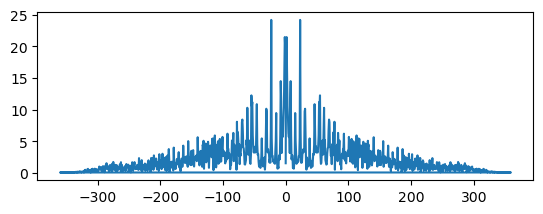

In [33]:
# plotting the FFT of the signal
# fft of the original signal.
org_fft = np.fft.fft(sample_data)
freq = np.fft.fftfreq(sample_data.size, 1/720.)
f1 = plt.figure()
A1 = f1.add_subplot(211)
A1.plot(freq, np.abs(org_fft))
plt.show()

In [34]:
sample_data.shape

(1000,)

In [35]:
org_fft.shape

(1000,)

In [36]:
def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, filter_order: int = 5):
    # Normalize cutoff frequency (Nyquist frequency = sample_rate / 2)
    nyquist = 0.5 * sample_rate
    norm_cutoff = cutoff / nyquist

    # Create a lowpass FIR filter using a windowed sinc function
    t = np.arange(-filter_order // 2, filter_order // 2 + 1)
    h = np.sinc(2 * norm_cutoff * t)
    window = np.hamming(filter_order + 1)
    h = h * window
    h = h / np.sum(h)

    # Apply the filter using 1D convolution
    data_tf = tf.convert_to_tensor(data, dtype=tf.float32)
    h_tf = tf.convert_to_tensor(h, dtype=tf.float32)
    h_tf = tf.reshape(h_tf, [-1, 1, 1])  # Shape [filter_width, in_channels, out_channels]

    data_tf = tf.reshape(data_tf, [1, -1, 1])  # Shape [batch, width, channels]
    filtered_tf = tf.nn.conv1d(data_tf, h_tf, stride=1, padding='SAME')
    filtered_data = tf.squeeze(filtered_tf).numpy()

    return filtered_data

def highpass(data: np.ndarray, cutoff: float, sample_rate: float, filter_order: int = 5):
    # Get lowpass filter
    lowpass_filtered = lowpass(data, cutoff, sample_rate, filter_order)

    # Highpass = original - lowpass (simple spectral inversion)
    highpass_filtered = data - lowpass_filtered
    return highpass_filtered


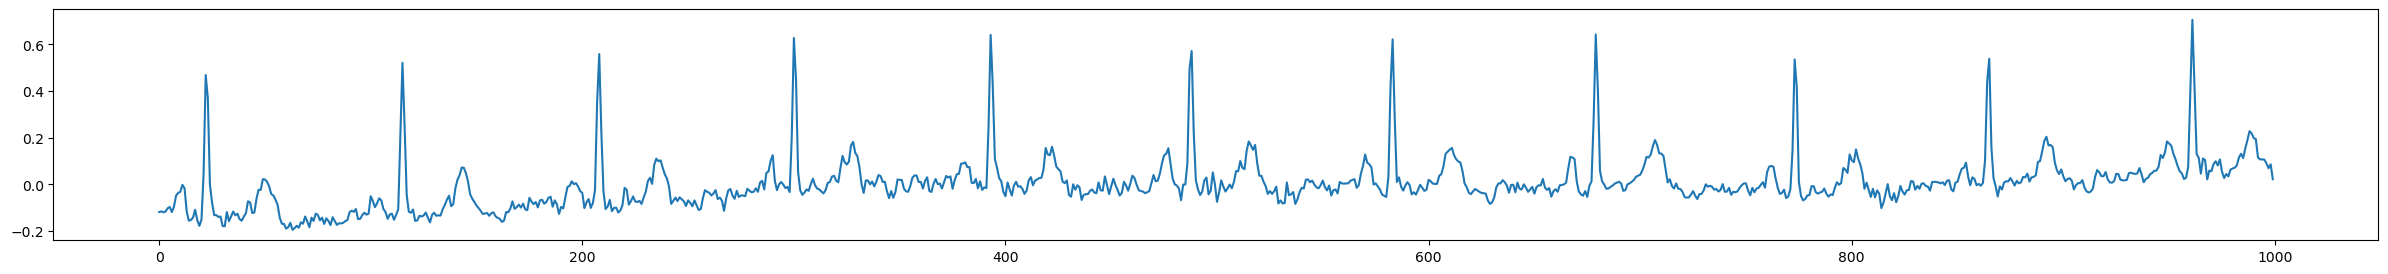

In [37]:
plt.figure(figsize=(30, 3))
plt.plot(sample_data)
plt.show()

In [38]:
low_filtered_data = lowpass(sample_data,30,sampling_rate)

2025-05-05 22:03:33.726210: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-05-05 22:03:33.726238: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-05-05 22:03:33.726247: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-05-05 22:03:33.726301: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-05 22:03:33.726320: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


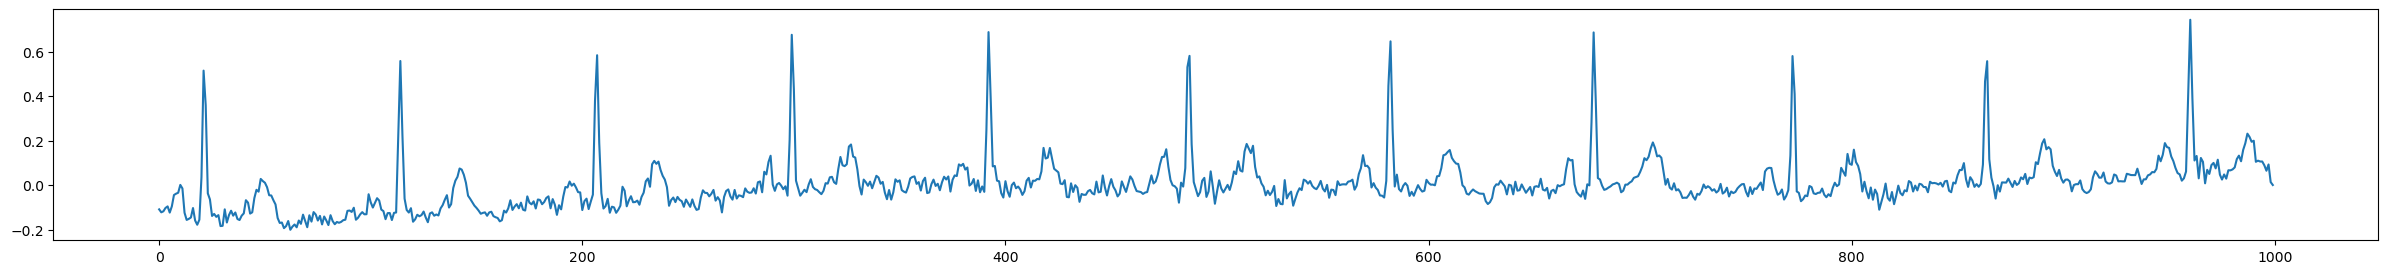

In [39]:
plt.figure(figsize=(30, 3))
plt.plot(low_filtered_data)
plt.show()

In [40]:
filtered_data = highpass(low_filtered_data, 500 , sampling_rate)

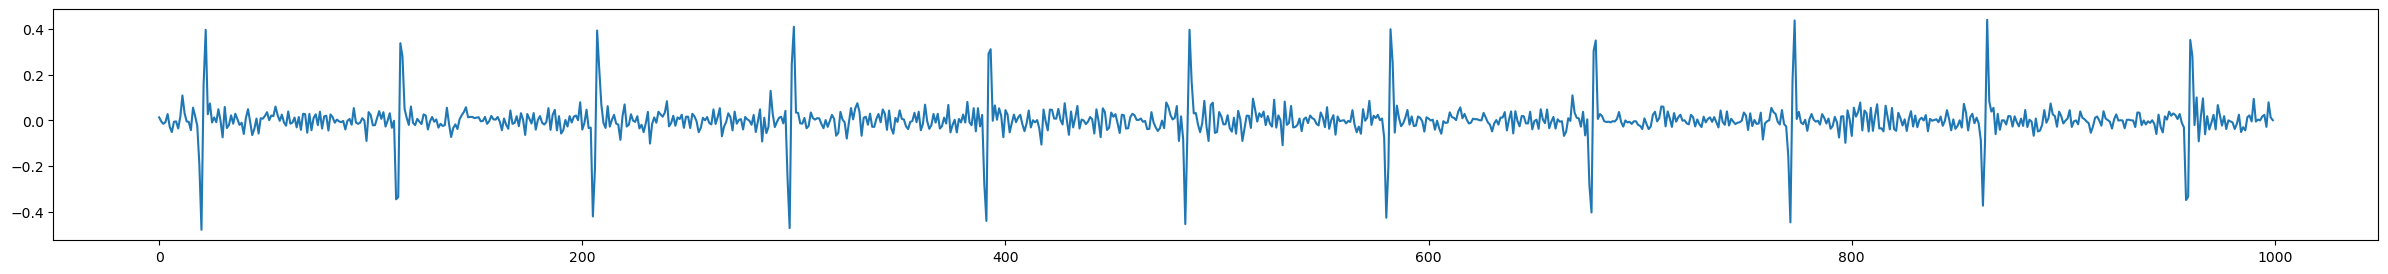

In [41]:
plt.figure(figsize=(30, 3))
plt.plot(filtered_data)
plt.show()

In [42]:
def lowpass_scipy(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    sos = signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    filtered_data = signal.sosfiltfilt(sos, data)
    return filtered_data

def highpass_scipy(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    sos = signal.butter(poles, cutoff, 'highpass', fs=sample_rate, output='sos')
    filtered_data = signal.sosfiltfilt(sos, data)
    return filtered_data

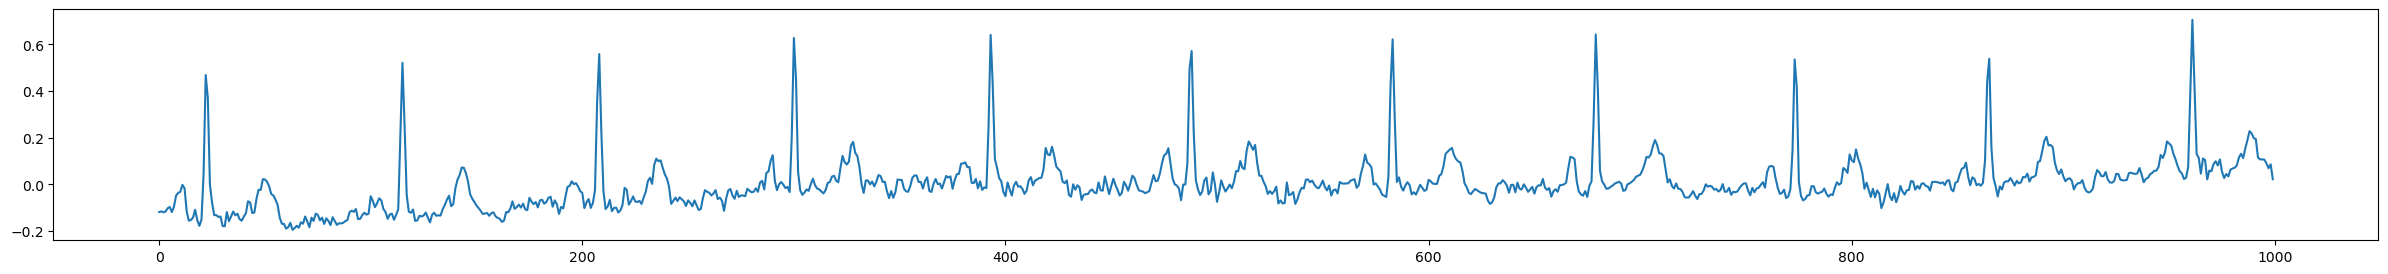

In [43]:
plt.figure(figsize=(30, 3))
plt.plot(sample_data)
plt.show()

In [44]:
high_filtered_data = highpass_scipy(sample_data, 1 , sampling_rate, 7)

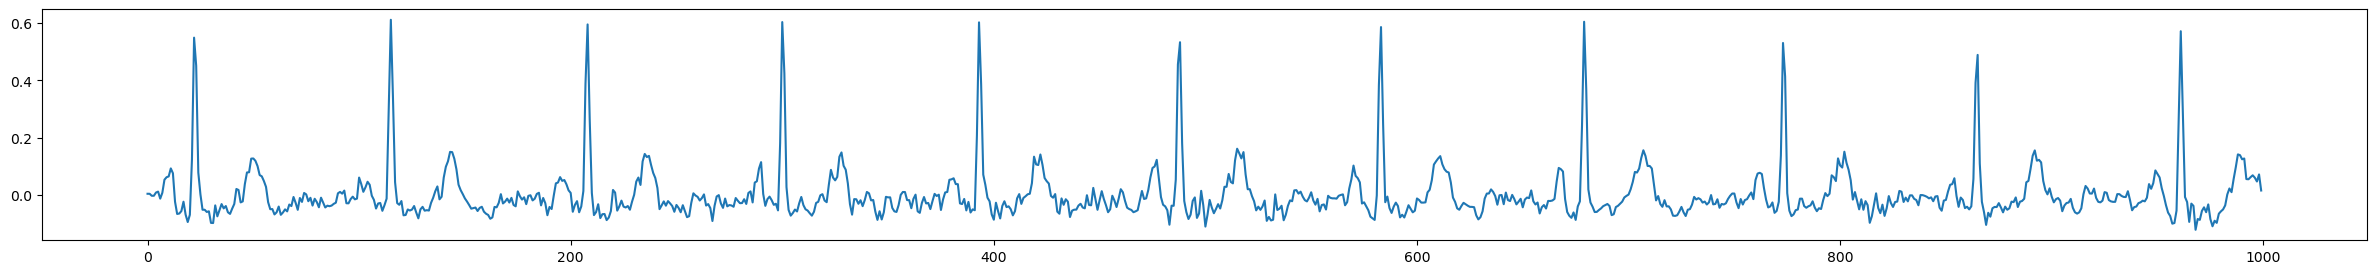

In [45]:
plt.figure(figsize=(30, 3))
plt.plot(high_filtered_data)
plt.show()

In [46]:
low_filtered_data = lowpass_scipy(high_filtered_data,15,sampling_rate)

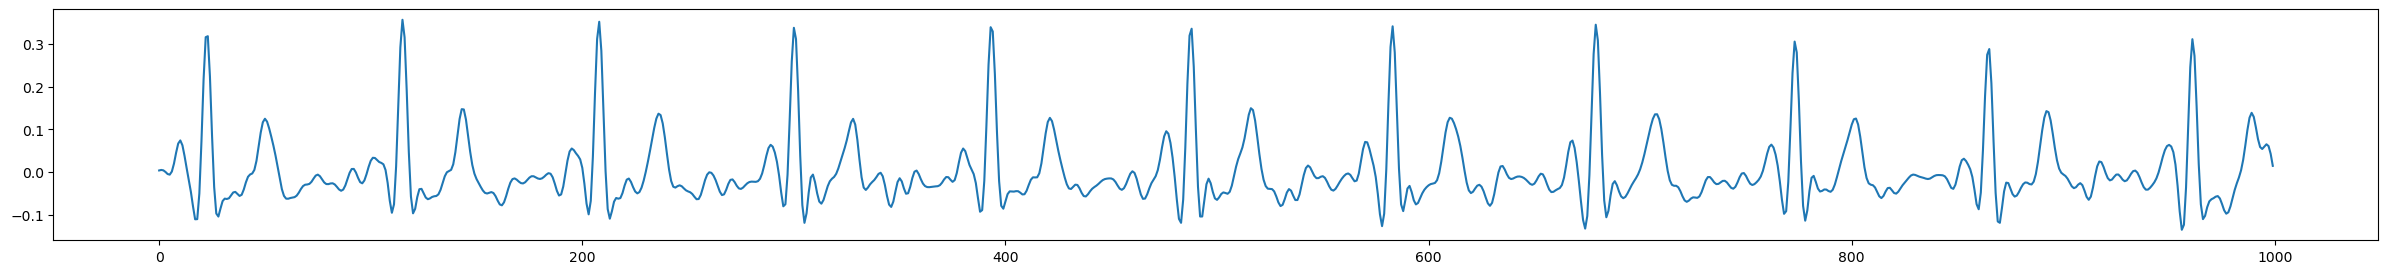

In [47]:
plt.figure(figsize=(30, 3))
plt.plot(low_filtered_data)
plt.show()

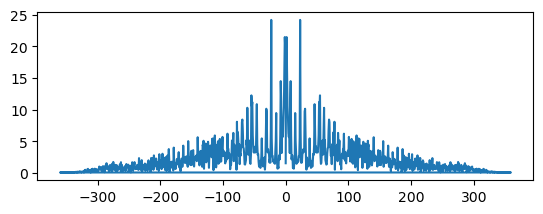

In [48]:
# plotting the FFT of the signal
# fft of the original signal.
org_fft = np.fft.fft(sample_data)
freq = np.fft.fftfreq(sample_data.size, 1/720.)
f1 = plt.figure()
A1 = f1.add_subplot(211)
A1.plot(freq, np.abs(org_fft))
plt.show()

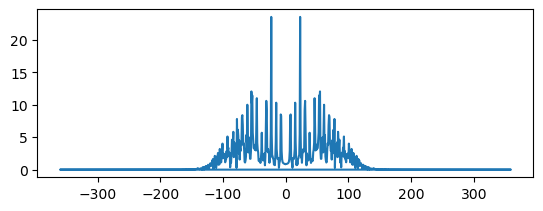

In [49]:
# plotting the FFT of the signal
# fft of the original signal.
org_fft = np.fft.fft(low_filtered_data)
freq = np.fft.fftfreq(low_filtered_data.size, 1/720.)
f1 = plt.figure()
A1 = f1.add_subplot(211)
A1.plot(freq, np.abs(org_fft))
plt.show()

---

new Sample

In [50]:
sample_mi = x_all[y_all['MI']==1].transpose(0, 2, 1)[0][2]

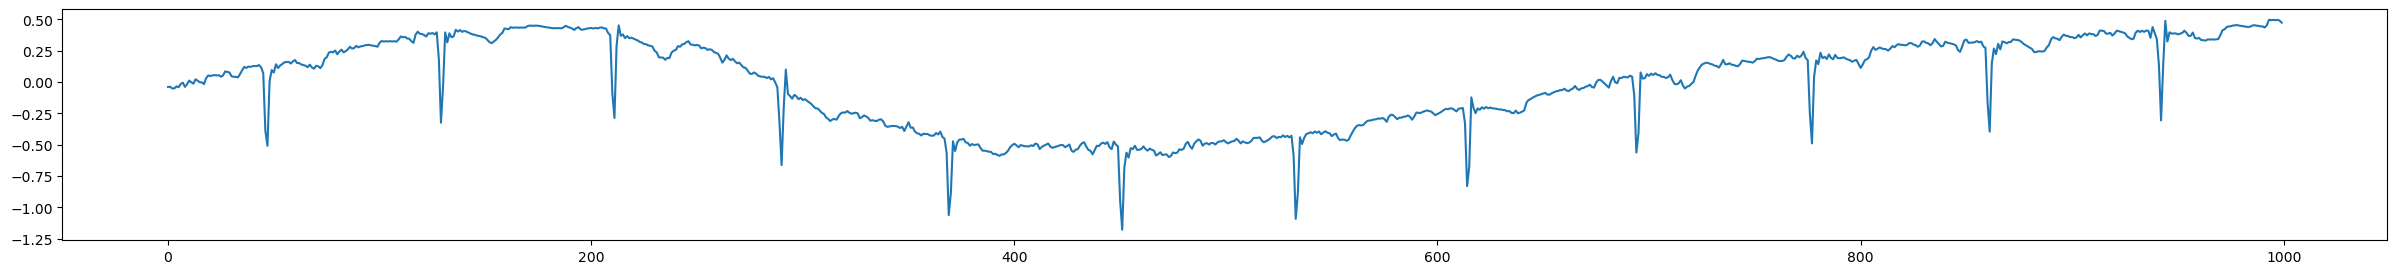

In [51]:
plt.figure(figsize=(30, 3))
plt.plot(sample_mi)
plt.show()

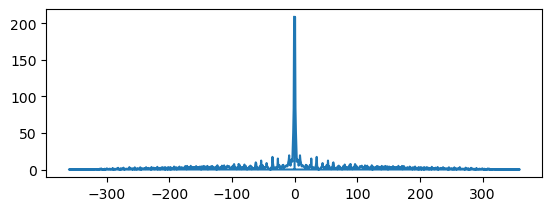

In [52]:
# plotting the FFT of the signal
# fft of the original signal.
org_fft = np.fft.fft(sample_mi)
freq = np.fft.fftfreq(sample_mi.size, 1/720.)
f1 = plt.figure()
A1 = f1.add_subplot(211)
A1.plot(freq, np.abs(org_fft))
plt.show()

In [236]:
high_filtered_data_s2 = highpass_scipy(sample_mi, 1 , sampling_rate, 5)

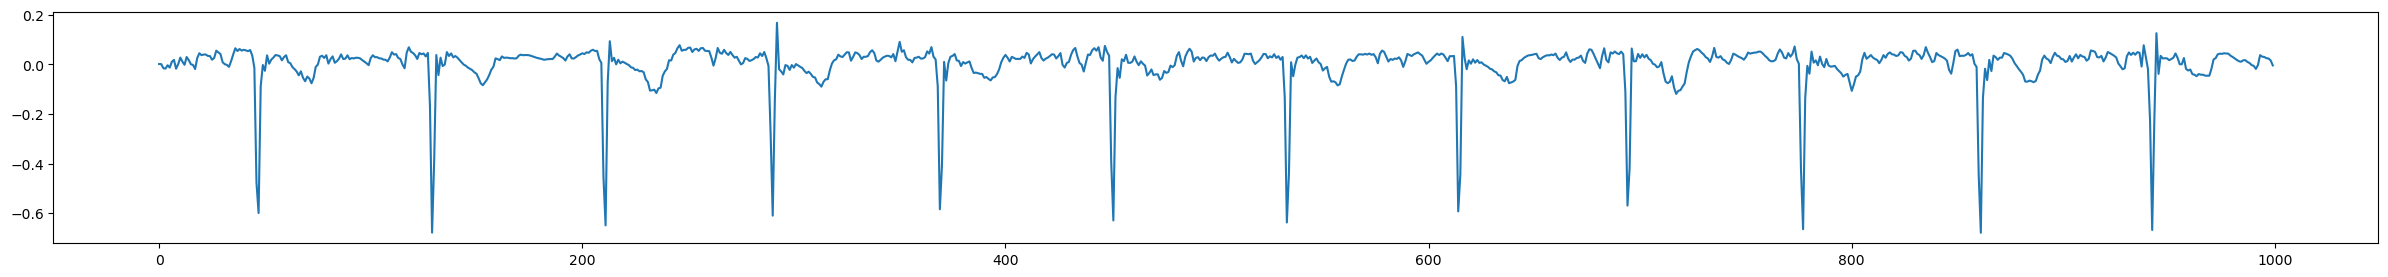

In [237]:
plt.figure(figsize=(30, 3))
plt.plot(high_filtered_data_s2)
plt.show()

In [252]:
low_filtered_data_s2 = lowpass_scipy(high_filtered_data_s2,15, sampling_rate, 5)

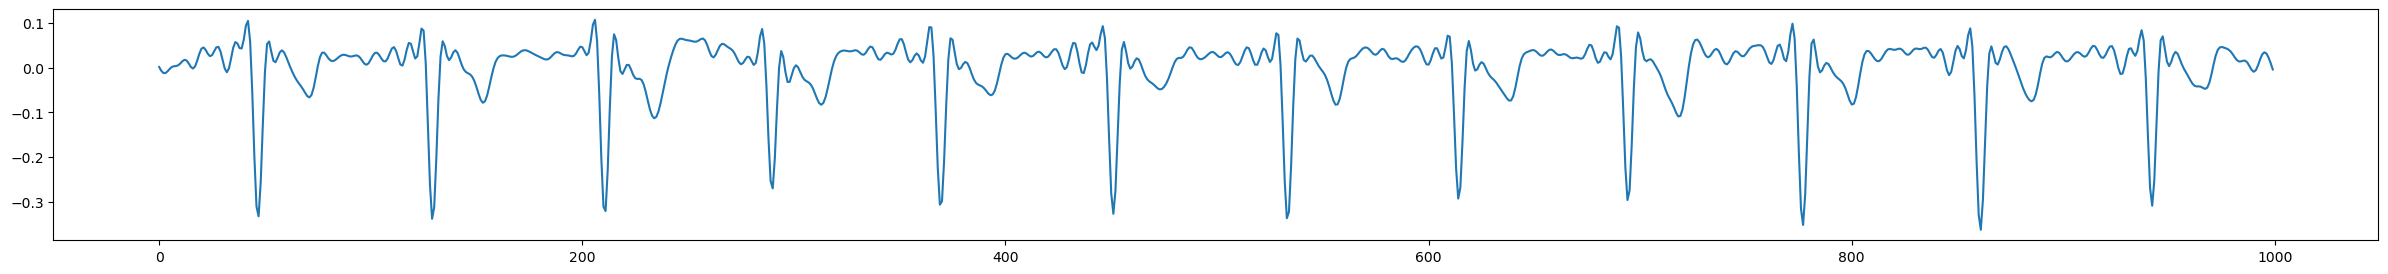

In [253]:
plt.figure(figsize=(30, 3))
plt.plot(low_filtered_data_s2)
plt.show()

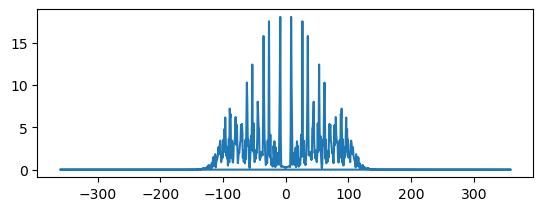

In [57]:
# plotting the FFT of the signal
# fft of the original signal.
org_fft = np.fft.fft(low_filtered_data_s2)
freq = np.fft.fftfreq(low_filtered_data_s2.size, 1/720.)
f1 = plt.figure()
A1 = f1.add_subplot(211)
A1.plot(freq, np.abs(org_fft))
plt.show()

----

12 head pipeline

In [58]:
sample_mi_12h = x_all[y_all['MI']==1].transpose(0, 2, 1)[0]

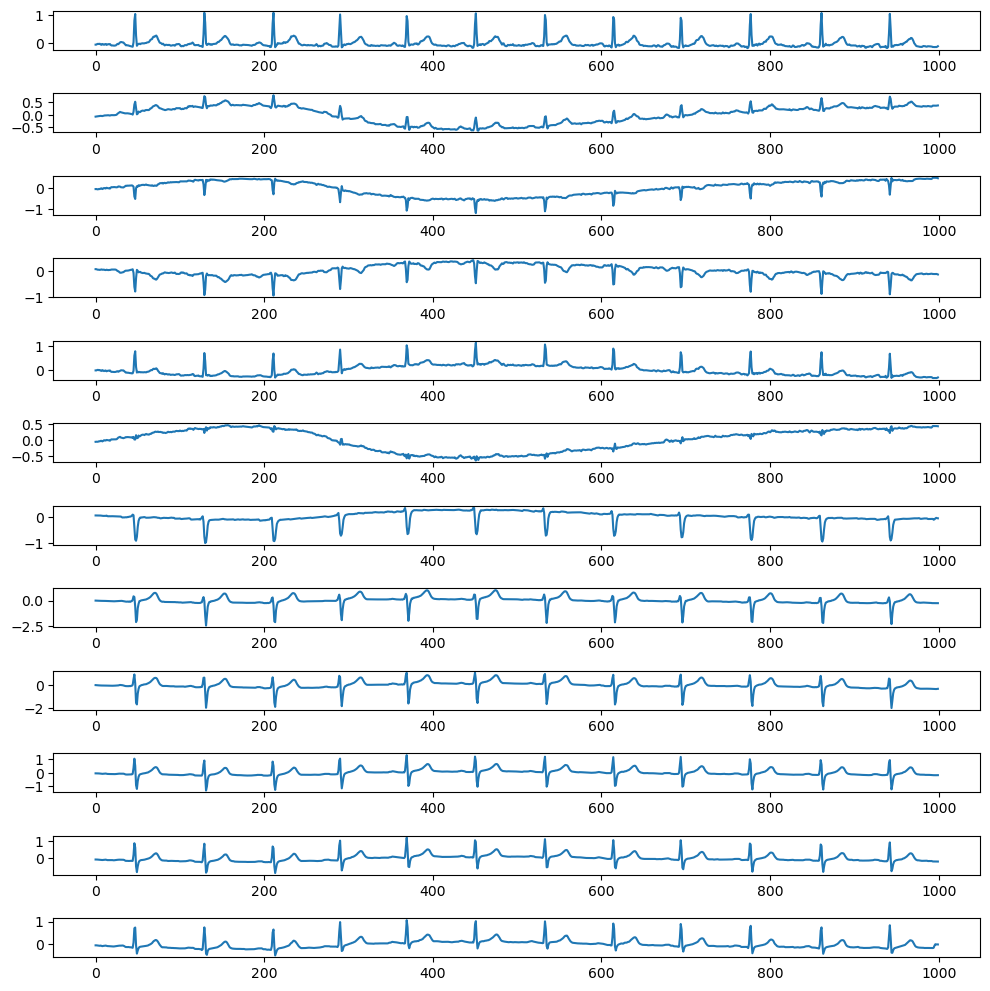

In [59]:
bar, axes = plt.subplots(12, 1, figsize=(10,10))
# plt.figure(figsize=(30, 3))
for idx, ecg_h in enumerate(sample_mi_12h):
    sns.lineplot(ecg_h, ax=axes[idx])
# plt.plot(sample_mi_12h)
plt.tight_layout()
plt.show()

In [60]:
high_filtered_data_12h = highpass_scipy(sample_mi_12h, 1 , sampling_rate, 7)

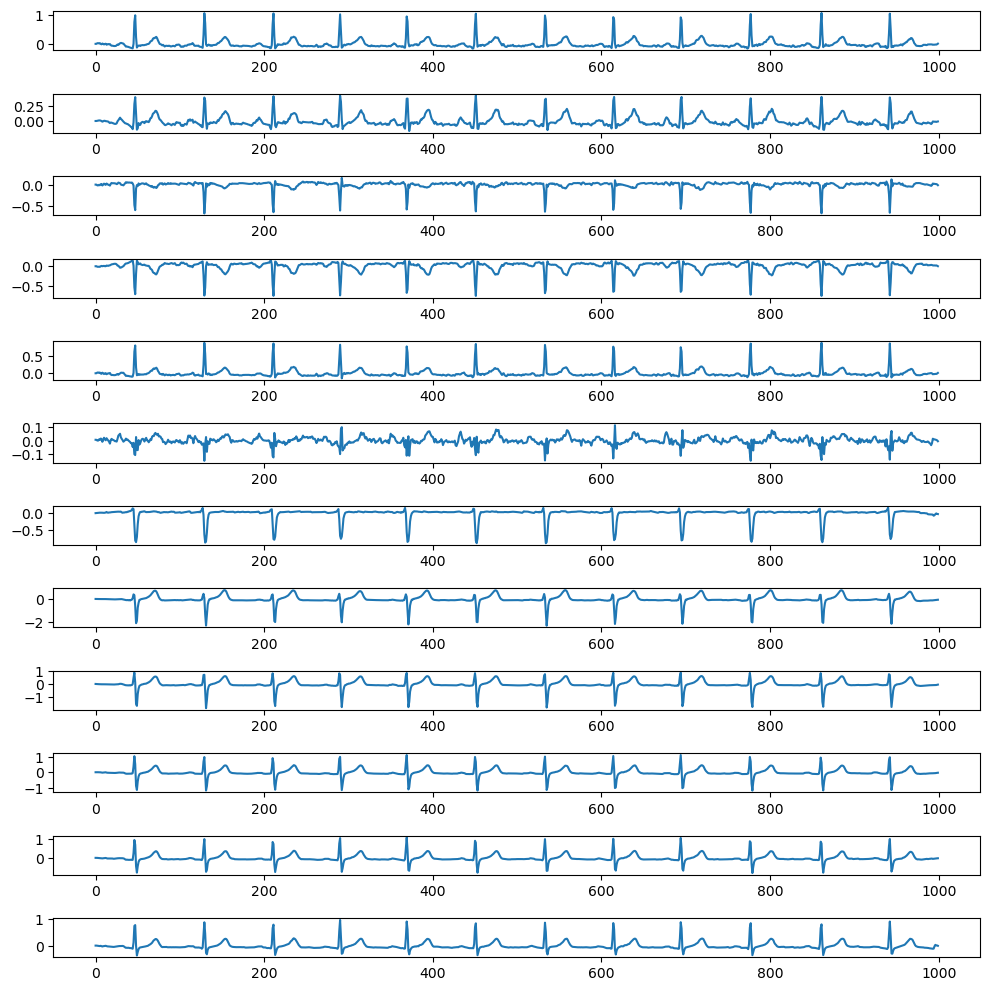

In [61]:
bar, axes = plt.subplots(12, 1, figsize=(10,10))
# plt.figure(figsize=(30, 3))
for idx, ecg_h in enumerate(high_filtered_data_12h):
    sns.lineplot(ecg_h, ax=axes[idx])
# plt.plot(sample_mi_12h)
plt.tight_layout()
plt.show()

In [62]:
low_filtered_data_12h = lowpass_scipy(high_filtered_data_12h,30,sampling_rate)

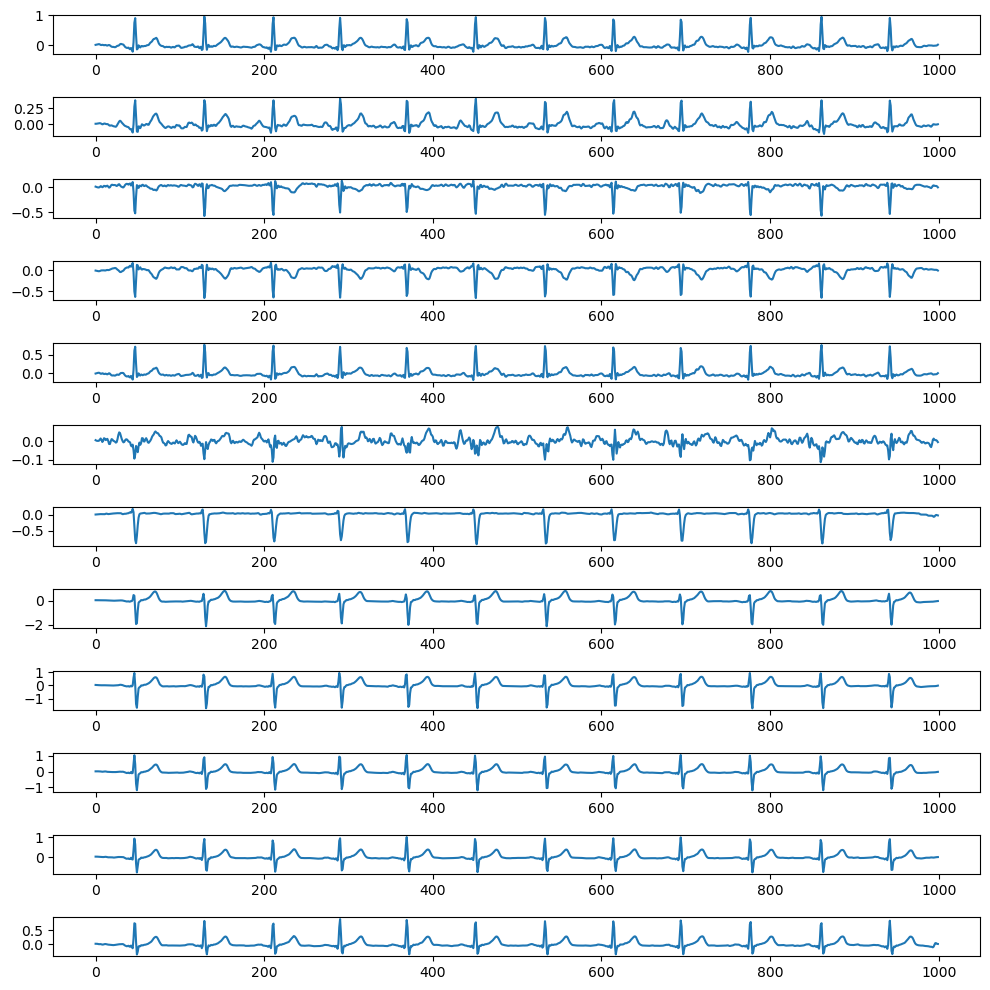

In [63]:
bar, axes = plt.subplots(12, 1, figsize=(10,10))
# plt.figure(figsize=(30, 3))
for idx, ecg_h in enumerate(low_filtered_data_12h):
    sns.lineplot(ecg_h, ax=axes[idx])
# plt.plot(sample_mi_12h)
plt.tight_layout()
plt.show()

In [64]:
low_filtered_data_12h.shape

(12, 1000)

In [65]:
x = 3
y = 5

dummy_array = np.zeros((x,y))

In [66]:
print(dummy_array)


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [72]:
from tensorflow.keras import Model, Input

In [270]:
resnet18 = None

In [271]:
import resnet
import importlib
importlib.reload(resnet)
resnet18 = resnet.resnet18


In [272]:
inputs = Input(batch_size=12, shape=(12,1000,1))
outputs = resnet18(inputs, num_classes=5)
model = Model(inputs, outputs)
model.summary()


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_43      │ (12, 12, 1000, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (12, 1, 200, 64)  │      3,840 │ input_layer_43[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn1                 │ (12, 1, 200, 64)  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ relu1 (ReLU)        │ (12, 1, 200, 64)  │          0 │ bn1[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (12, 64)          │          0 │ relu1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (12, 64)          │          0 │ relu1[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (12, 8)           │        512 │ global_average_p… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_83 (Dense)    │ (12, 64)          │        512 │ dense_82[0][0],   │
│                     │                   │            │ dense_82[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_41 (Add)        │ (12, 64)          │          0 │ dense_83[0][0],   │
│                     │                   │            │ dense_83[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_41       │ (12, 64)          │          0 │ add_41[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_74         │ (12, 1, 200, 64)  │          0 │ relu1[0][0],      │
│ (Multiply)          │                   │            │ activation_41[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_mean_expand… │ (12, 1, 200, 1)   │          0 │ multiply_74[0][0] │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_max_expand_… │ (12, 1, 200, 1)   │          0 │ multiply_74[0][0] │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_33      │ (12, 1, 200, 2)   │          0 │ reduce_mean_expa… │
│ (Concatenate)       │                   │            │ reduce_max_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (12, 1, 200, 1)   │         99 │ concatenate_33[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_75         │ (12, 1, 200, 64)  │          0 │ multiply_74[0][0… │
│ (Multiply)          │                   │            │ conv2d_33[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1.0.conv1_pad  │ (12, 3, 202, 64)  │          0 │ multiply_75[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1.0.conv1      │ (12, 1, 200, 64)  │     36,864 │ layer1.0.conv1_p

 Total params: 11,446,475 (43.66 MB)

 Trainable params: 11,436,875 (43.63 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [261]:
TrainModel = None

In [262]:
import train_model
import importlib
importlib.reload(train_model)
TrainModel = train_model.TrainModel


In [263]:
model_training = TrainModel()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()